In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')


In [2]:
x = np.linspace(-6.0, 6.0, 100)
y = np.sqrt(10**2, x**2)
y = np.hstack([y,-y])
x = np.hstack([x, -x])

In [3]:
x1 = np.linspace(-6.0, 6.0, 100)
y1 = np.sqrt(4**2 - x1**2)
y1 = np.hstack([y1,-y1])
x1 = np.hstack([x1, -x1])

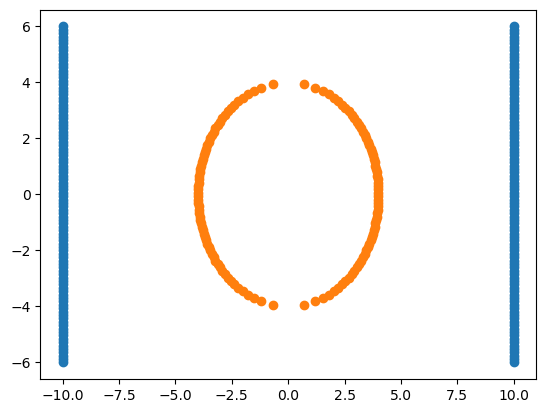

In [4]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [10]:
df1 = pd.DataFrame(np.vstack([y,x]).T, columns=['X1', "X2"])
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([y1,x1]).T, columns=['X1', "X2"])
df2['Y']=1
df = pd.concat([df1, df2], ignore_index=True)
df.head(5)

,X1,X2,Y
0,10.0,-6.000000,0
1,10.0,-5.878788,0
2,10.0,-5.757576,0
3,10.0,-5.636364,0
4,10.0,-5.515152,0


In [11]:
df1 = df.copy()

In [56]:
df1 = df1.dropna()

In [57]:
df1['x1square']=df['X1']**2
df1['x2square']=df['X2']**2
df1['x1x2'] = df1['X1']*df1['X2']
df1.head()

,X1,X2,Y,x1square,x2square,x1x2
0,10.0,-6.000000,0,100.0,36.000000,-60.000000
1,10.0,-5.878788,0,100.0,34.560147,-58.787879
2,10.0,-5.757576,0,100.0,33.149679,-57.575758
3,10.0,-5.636364,0,100.0,31.768595,-56.363636
4,10.0,-5.515152,0,100.0,30.416896,-55.151515


In [58]:
x =df1[['x1square', 'x2square', 'x1x2']]
y = df1['Y']

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [60]:
X_train.head()

,x1square,x2square,x1x2
365,12.470156,3.529844,6.634584
17,100.000000,15.518825,-39.393939
267,11.500459,4.499541,7.193524
235,12.910927,3.089073,-6.315282
88,100.000000,21.777778,46.666667


In [61]:
!pip install plotly

In [62]:
import plotly.express as px

In [63]:
fig = px.scatter_3d(df1, x='x1square', y ='x2square', z = 'x1x2', color = 'Y')
fig.show()
plt.show()

In [64]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
cls = SVC(kernel = 'linear') # why linear>> bcz we hv created polynomial
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [66]:
df= df.dropna()

In [69]:
df.head()

,X1,X2,Y
0,10.0,-6.000000,0
1,10.0,-5.878788,0
2,10.0,-5.757576,0
3,10.0,-5.636364,0
4,10.0,-5.515152,0


In [73]:
X = df[['X1', 'X2']]
y = df['Y']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state =1)

In [74]:
X_train

,X1,X2
365,-3.531311,-1.878788
17,10.000000,-3.939394
267,3.391233,2.121212
235,3.593178,-1.757576
88,10.000000,4.666667
...,...,...
220,1.792751,-3.575758
272,2.926087,2.727273
72,10.000000,2.727273
252,3.988505,0.303030


In [75]:
X_test

,X1,X2
59,10.000000,1.151515
319,-1.527225,3.696970
180,-10.000000,-3.696970
192,-10.000000,-5.151515
335,-3.593178,1.757576
...,...,...
39,10.000000,-1.272727
117,-10.000000,3.939394
78,10.000000,3.454545
127,-10.000000,2.727273


# Check on Polynomial 

In [78]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
cls = SVC(kernel = 'poly') # why linear>> bcz we hv created polynomial
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
accuracy_score(y_test, y_pred)

0.62

# Check on RBF

In [79]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
cls = SVC(kernel = 'rbf') # why linear>> bcz we hv created polynomial
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

# Check on Sigmoid

In [81]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
cls = SVC(kernel = 'sigmoid') # why linear>> bcz we hv created polynomial
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
accuracy_score(y_test, y_pred)

0.63